# Spatial Representations and Relationships - Raster Data

In [1]:
# Load relevant R packages
inLibraries = list('repr','rgdal','spdep','raster')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
"package 'rgdal' was built under R version 3.4.2"Warning message:
"package 'sp' was built under R version 3.4.2"Warning message:
"package 'spdep' was built under R version 3.4.2"Warning message:
"package 'raster' was built under R version 3.4.2"

In [2]:
ras_name <- 'datasets/nemo_weather/nemowx3.tif'

In [4]:
#Rasterlayer as cellids
inRas <- raster(ras_name, value = FALSE)

#Rasterlayer as cell values
inRas2 <- raster(ras_name, value = TRUE)

In [5]:
#look at properties of input raster
inRas

class       : RasterLayer 
dimensions  : 35, 41, 1435  (nrow, ncol, ncell)
resolution  : 5000, 5000  (x, y)
extent      : 462749.5, 667749.5, 4332713, 4507713  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0 
data source : C:\Users\Jacky Zhao\Desktop\repos\R-Data\datasets\nemo_weather\nemowx3.tif 
names       : nemowx3 


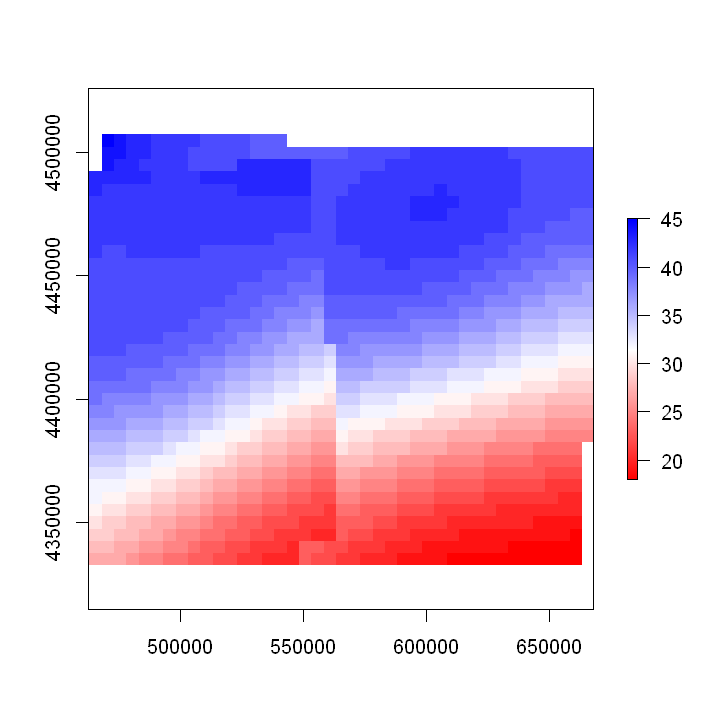

In [6]:
#Display the raster
plot(inRas, col = colorRampPalette(c("red", "white", "blue"))(255))

## Raster Neighborhoods

What if we'd like to define the neighborhood of a raster cell (cell A) as the set of cells that share an edge with cell A - rooks criterion (refer to these as set A1)?  Since the spdep library contains many functions for working with connectivity matrices and spatial weights, let's use its 'cell2nb' function (spdep library) to quickly generate neighbors for each raster cell. 

The cell2nb() function doesn't use an existing raster as input. The reason for this is that most rasters based upon a regular grid of cells will maintain exactly the same neighborhood structure and thus, only some sort of cell indexing system is needed. The cell2nb() function only requires the number of rows, columns and the adjacency criterion to be evaluated.

In [7]:
#Identify the neighbors of each cell
numcells <- ncell(inRas)
numcols <- ncol(inRas)
numrows <- nrow(inRas)

In [11]:
numcells

[1] 1435

In [12]:
numcols

[1] 41

In [13]:
numrows

[1] 35

In [16]:
inRas[] <- 1:numcells
inRas2[] <- 1:numcells

#apply the 'cell2nb' function
Ras.nb <- cell2nb(numrows, numcols, type = "rook", torus = FALSE)

head(Ras.nb, 10)

[[1]]
[1]  2 36

[[2]]
[1]  1  3 37

[[3]]
[1]  2  4 38

[[4]]
[1]  3  5 39

[[5]]
[1]  4  6 40

[[6]]
[1]  5  7 41

[[7]]
[1]  6  8 42

[[8]]
[1]  7  9 43

[[9]]
[1]  8 10 44

[[10]]
[1]  9 11 45

In [17]:
# get the values of the cell ids..here are two different ways of doing the same thing   
cellList <- values(inRas)   

In [18]:
cellList[1:10]

[1]  1  2  3  4  5  6  7  8  9 10

In [19]:
cellvalues <- as.numeric(lapply(1:numcells, function(x) inRas2[x]))

In [20]:
cellvalues[1:10]

[1]  1  2  3  4  5  6  7  8  9 10

In [21]:
head(cellList)
head(cellvalues)

[1] 1 2 3 4 5 6

[1] 1 2 3 4 5 6

## Formatting data for use in multiple libraries

There are other ways of generating the adjacency matrices that include greater flexibility.  

For instance, consider the adjacent() function (raster library).  The adjacent() function returns a numeric vector for each cell containing its neighbors. 

If we wish to use the output of the adjacent() function in other  spdep library functions, then we need to make sure to convert it into the nb class object required by spdep.

In [22]:
typeof(Ras.nb)

[1] "list"

In [25]:
str(Ras.nb)

List of 1435
 $ : int [1:2] 2 36
 $ : int [1:3] 1 3 37
 $ : int [1:3] 2 4 38
 $ : int [1:3] 3 5 39
 $ : int [1:3] 4 6 40
 $ : int [1:3] 5 7 41
 $ : int [1:3] 6 8 42
 $ : int [1:3] 7 9 43
 $ : int [1:3] 8 10 44
 $ : int [1:3] 9 11 45
 $ : int [1:3] 10 12 46
 $ : int [1:3] 11 13 47
 $ : int [1:3] 12 14 48
 $ : int [1:3] 13 15 49
 $ : int [1:3] 14 16 50
 $ : int [1:3] 15 17 51
 $ : int [1:3] 16 18 52
 $ : int [1:3] 17 19 53
 $ : int [1:3] 18 20 54
 $ : int [1:3] 19 21 55
 $ : int [1:3] 20 22 56
 $ : int [1:3] 21 23 57
 $ : int [1:3] 22 24 58
 $ : int [1:3] 23 25 59
 $ : int [1:3] 24 26 60
 $ : int [1:3] 25 27 61
 $ : int [1:3] 26 28 62
 $ : int [1:3] 27 29 63
 $ : int [1:3] 28 30 64
 $ : int [1:3] 29 31 65
 $ : int [1:3] 30 32 66
 $ : int [1:3] 31 33 67
 $ : int [1:3] 32 34 68
 $ : int [1:3] 33 35 69
 $ : int [1:2] 34 70
 $ : int [1:3] 1 37 71
 $ : int [1:4] 2 36 38 72
 $ : int [1:4] 3 37 39 73
 $ : int [1:4] 4 38 40 74
 $ : int [1:4] 5 39 41 75
 $ : int [1:4] 6 40 42 76
 $ : int [1:4] 7 

So, basically, it's a list of integer vectors....AND there are certain attributes (see the end of the output) such as 'class' which need to be set for spdep to recognize this as a nb class object. 

Thus, when we apply the adjacent() function, we need to be sure to convert numeric vectors to integer vectors, add the integer vectors to a list, AND set the appropriate attributes of the list object. 

To accomplish this, first define a .nb object as a list. Next, iterate through the cells in the raster, apply the 'adjacent' function and add the results to the .nb list. Note that the adjacent() function requires a parameter named 'directions'. This parameter reflects the directions that of movement that are permitted among raster cells.  For example, 4 directions equates to the Rook's criterion.  Finally, a .nb object (as defined by spdep) requires a set of specific attributes to be recognized as a .nb object. Set these class and attr attributes accordingly.

In [26]:
#create new neighborhood list
NeighList.nb <- list()

In [27]:
cellList[1:10]

[1]  1  2  3  4  5  6  7  8  9 10

In [28]:
#iterate through cell id's, query neighbors, and add them to list
cntit <- 1

for (cell in cellList){
    cellnm <- c(cell)
    suppressMessages(
        NeighList.nb[[cntit]] <- as.integer(adjacent(inRas, cells = cellnm, 
                                                                      directions=4, 
                                                                      pairs=FALSE, target=NULL, 
                                                                      sorted=TRUE, include=FALSE, id=TRUE))
    )
    
    cntit <- cntit + 1
}

In [29]:
NeighList.nb[1:10]

[[1]]
[1]  2 42

[[2]]
[1]  1  3 43

[[3]]
[1]  2  4 44

[[4]]
[1]  3  5 45

[[5]]
[1]  4  6 46

[[6]]
[1]  5  7 47

[[7]]
[1]  6  8 48

[[8]]
[1]  7  9 49

[[9]]
[1]  8 10 50

[[10]]
[1]  9 11 51

In [30]:
#set attributes of nb class object required by spdep
class(NeighList.nb) <- c("nb")
attr(NeighList.nb,"cell") <- c(TRUE)
attr(NeighList.nb, "rook") <- c(TRUE)
attr(NeighList.nb, "sym") <- c(TRUE)

#take a look at our new object ....look correct?
str(NeighList.nb)

List of 1435
 $ : int [1:2] 2 42
 $ : int [1:3] 1 3 43
 $ : int [1:3] 2 4 44
 $ : int [1:3] 3 5 45
 $ : int [1:3] 4 6 46
 $ : int [1:3] 5 7 47
 $ : int [1:3] 6 8 48
 $ : int [1:3] 7 9 49
 $ : int [1:3] 8 10 50
 $ : int [1:3] 9 11 51
 $ : int [1:3] 10 12 52
 $ : int [1:3] 11 13 53
 $ : int [1:3] 12 14 54
 $ : int [1:3] 13 15 55
 $ : int [1:3] 14 16 56
 $ : int [1:3] 15 17 57
 $ : int [1:3] 16 18 58
 $ : int [1:3] 17 19 59
 $ : int [1:3] 18 20 60
 $ : int [1:3] 19 21 61
 $ : int [1:3] 20 22 62
 $ : int [1:3] 21 23 63
 $ : int [1:3] 22 24 64
 $ : int [1:3] 23 25 65
 $ : int [1:3] 24 26 66
 $ : int [1:3] 25 27 67
 $ : int [1:3] 26 28 68
 $ : int [1:3] 27 29 69
 $ : int [1:3] 28 30 70
 $ : int [1:3] 29 31 71
 $ : int [1:3] 30 32 72
 $ : int [1:3] 31 33 73
 $ : int [1:3] 32 34 74
 $ : int [1:3] 33 35 75
 $ : int [1:3] 34 36 76
 $ : int [1:3] 35 37 77
 $ : int [1:3] 36 38 78
 $ : int [1:3] 37 39 79
 $ : int [1:3] 38 40 80
 $ : int [1:3] 39 41 81
 $ : int [1:2] 40 82
 $ : int [1:3] 1 43 83
 $ 

In [31]:
#Convert to neighborhood list
ras.nb.b <- nb2listw(NeighList.nb, style='B')
    
#View first n neighborhood sets
head(ras.nb.b$neighbours,n=5)

[[1]]
[1]  2 42

[[2]]
[1]  1  3 43

[[3]]
[1]  2  4 44

[[4]]
[1]  3  5 45

[[5]]
[1]  4  6 46

## Weighting Neighbors

What if we'd like to weigh neighbors by their distance to a cell?  This can be accomplished using the spdep library's function nbdist().  However, nbdist() assumes a set of points are available so the distance calculations can be made.  Therefore first convert the raster to points of R's spatialpoints type using the rasterToPoints() function (raster library).  Next, the nbdist() function is applied to compute the distance between each point and its neighbors. The output of this 'ndlist' is in the same format as a neighborhood object, but where the values indicate the distance between the neighbors. Why are all the distances the same? Remember, the Rooks Criterion was the neighborhood relationship that was applied in this case. That is, the distance to adjacent cells is that between cells sharing a border. Given the cells are systematically spaced, all of the distances are the same.

In [32]:
#convert raster to points
RasPoints <- rasterToPoints(inRas2, spatial = TRUE)

#Compute distance to each neighbor
ndlist <- nbdists(NeighList.nb, coordinates(RasPoints))
ndlist[1:20]

[[1]]
[1] 5000 5000

[[2]]
[1] 5000 5000 5000

[[3]]
[1] 5000 5000 5000

[[4]]
[1] 5000 5000 5000

[[5]]
[1] 5000 5000 5000

[[6]]
[1] 5000 5000 5000

[[7]]
[1] 5000 5000 5000

[[8]]
[1] 5000 5000 5000

[[9]]
[1] 5000 5000 5000

[[10]]
[1] 5000 5000 5000

[[11]]
[1] 5000 5000 5000

[[12]]
[1] 5000 5000 5000

[[13]]
[1] 5000 5000 5000

[[14]]
[1] 5000 5000 5000

[[15]]
[1] 5000 5000 5000

[[16]]
[1] 5000 5000 5000

[[17]]
[1] 5000 5000 5000

[[18]]
[1] 5000 5000 5000

[[19]]
[1] 5000 5000 5000

[[20]]
[1] 5000 5000 5000

## Row-Normalization

Given the distances between neighboring cells, generate a row-normalized spatial weights matrix. Here this can be done by applying the nb2mat() function (spdep library) and specifying the parameter 'glist' to be the distance weights list created above.

In [33]:
#Row standardized (each row element divided by number of neighbors in row) continuity matrix format
ras.mat <- nb2mat(NeighList.nb, glist = ndlist, style = 'W')

head(ras.mat)

0.0000000,0.5000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.3333333,0.0000000,0.3333333,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.0000000,0.3333333,0.0000000,0.3333333,0.0000000,0.0000000,0.0000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.0000000,0.0000000,0.3333333,0.0000000,0.3333333,0.0000000,0.0000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.0000000,0.0000000,0.0000000,0.3333333,0.0000000,0.3333333,0.0000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.0000000,0.0000000,0.0000000,0.0000000,0.3333333,0.0000000,0.3333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Higher Order Raster Neighborhoods

What if we'd like to define the neighborhood of a raster cell (cell A) as the set of cells that share an edge or vertex with cell A (refer to these as set A1) as well as the cells that share an edge or vertex with cells in set A1 (refer to these as set A2)?  These hierarchical neighborhoods are often referred to as orders (1st order or 2nd order neighborhoods in this example) or as spatial lags.  Here, this is done using the 'nblag' and 'nblag_cumul' functions (spdep library). 'nblag' creates a separate neighbors list for a particular lag.  'nblag_cumul' places all individual lag sets into a single list.## Higher Order Raster Neighborhoods

What if we'd like to define the neighborhood of a raster cell (cell A) as the set of cells that share an edge or vertex with cell A (refer to these as set A1) as well as the cells that share an edge or vertex with cells in set A1 (refer to these as set A2)?  These hierarchical neighborhoods are often referred to as orders (1st order or 2nd order neighborhoods in this example) or as spatial lags.  Here, this is done using the 'nblag' and 'nblag_cumul' functions (spdep library). 'nblag' creates a separate neighbors list for a particular lag.  'nblag_cumul' places all individual lag sets into a single list.

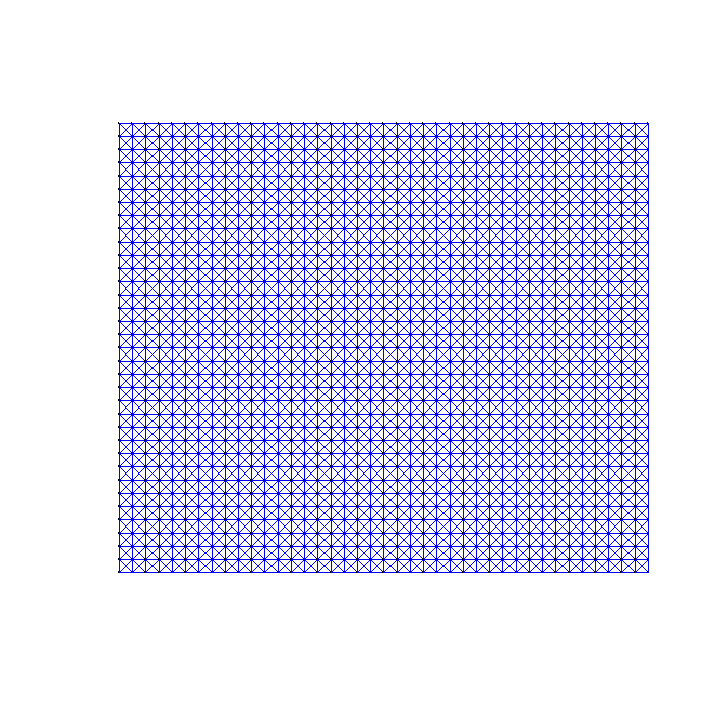

In [36]:
#create a higher order neighborhood
maxlag <- 2
inRas.lag <- nblag(NeighList.nb,2)
inRas.cuml <- nblag_cumul(inRas.lag)

#Display the raster
plot(inRas.lag[[1]], coordinates(inRas), col = "red", cex = .1, lwd = .15)
plot(inRas.lag[[2]], coordinates(inRas), add = TRUE, col = "blue", cex = .1,lwd = .06)